In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


In [56]:
import tensorflow as tf
import os

In [3]:
# gpus=tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
from PIL import Image
import shutil
from matplotlib import pyplot as plt

In [5]:
og_data_dir='/kaggle/input/happy-and-sad-people'

In [6]:
data_dir = '/kaggle/working/data_dir'
os.makedirs(data_dir, exist_ok=True)

In [7]:
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(og_data_dir):
    class_path = os.path.join(og_data_dir, image_class)
    
    if not os.path.isdir(class_path):
        continue
    
    target_class_dir = os.path.join(data_dir, image_class)
    os.makedirs(target_class_dir, exist_ok=True)

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            with Image.open(image_path) as img_pil:
                img_format = img_pil.format.lower()
            
            if img_format in image_exts:
                # Copy valid image to the writable directory
                shutil.copy(image_path, os.path.join(target_class_dir, image))
            else:
                print(f'Skipped invalid format: {image_path}')
        
        except Exception as e:
            print(f'Issue with image: {image_path}, Error: {e}')

Skipped invalid format: /kaggle/input/happy-and-sad-people/sadppl/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/sadppl/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/sadppl/getty_91745128_333755.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/happyppl/getty_478389113_970647970450091_99776.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/happyppl/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/happyppl/getty_152414899_97046097045006_68075.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/happyppl/depositphotos_656997976-stock-photo-happy-different-young-people-having.jpg
Skipped invalid format: /kaggle/input/happy-and-sad-people/happyppl/67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshappy

In [9]:
img = cv2.imread(os.path.join(data_dir, 'happyppl', 'genuinely-happy-people-dont-complain-about.png'))

In [10]:
# plt.imshow(img)

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [12]:
import numpy as np

In [27]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/working/data_dir')

Found 174 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

In [16]:
# batch

(array([[[[2.39000000e+02, 2.32000000e+02, 2.13000000e+02],
          [2.39000000e+02, 2.32000000e+02, 2.13000000e+02],
          [2.38898224e+02, 2.31898224e+02, 2.12898224e+02],
          ...,
          [2.51283203e+02, 2.47283203e+02, 2.35283203e+02],
          [2.51283203e+02, 2.47283203e+02, 2.35283203e+02],
          [2.51283203e+02, 2.47283203e+02, 2.35283203e+02]],
 
         [[2.39000000e+02, 2.32000000e+02, 2.13000000e+02],
          [2.39000000e+02, 2.32000000e+02, 2.13000000e+02],
          [2.38096344e+02, 2.31096344e+02, 2.12096344e+02],
          ...,
          [2.52000000e+02, 2.48000000e+02, 2.36000000e+02],
          [2.52000000e+02, 2.48000000e+02, 2.36000000e+02],
          [2.52000000e+02, 2.48000000e+02, 2.36000000e+02]],
 
         [[2.39000000e+02, 2.32000000e+02, 2.13000000e+02],
          [2.38000000e+02, 2.31000000e+02, 2.12000000e+02],
          [2.38000000e+02, 2.31000000e+02, 2.12000000e+02],
          ...,
          [2.51000000e+02, 2.49000000e+02, 2.3600

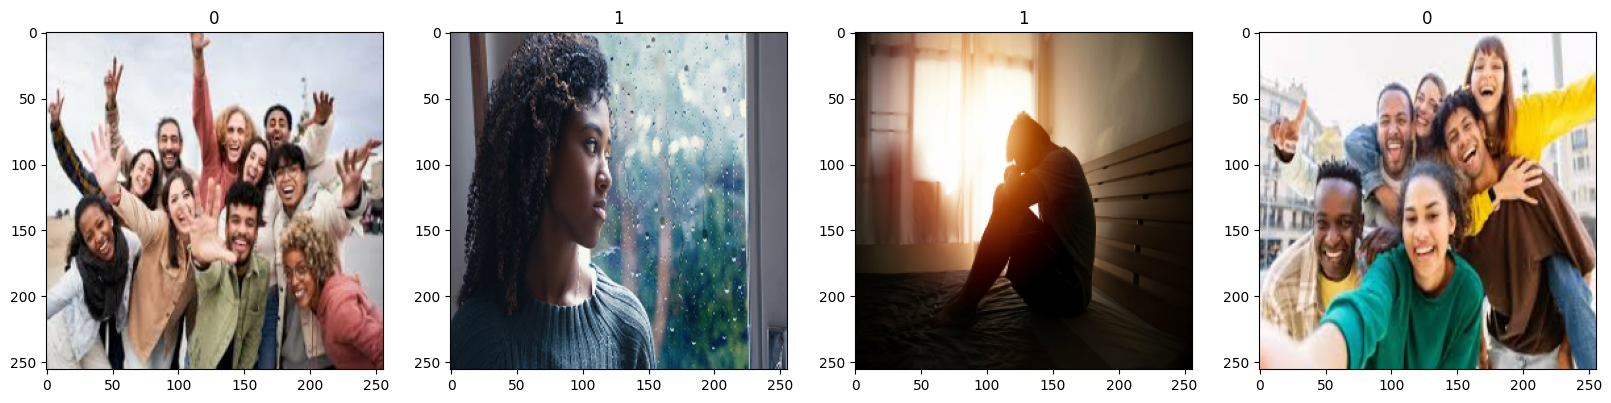

In [30]:
# Class 1 = Sad People
# Class 0 = Happy People
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
scaled_iterator.next()[0].max()

1.0

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [37]:
model = Sequential([
    Input(shape=(256, 256, 3)),                        
    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')                    
])

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
logdir = '/kaggle/working/logdir'
os.makedirs(logdir, exist_ok=True)

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6000 - loss: 0.8032 - val_accuracy: 0.3750 - val_loss: 0.7552
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4948 - loss: 0.7165 - val_accuracy: 0.7500 - val_loss: 0.6640
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6771 - loss: 0.6386 - val_accuracy: 0.5625 - val_loss: 0.6681
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6062 - loss: 0.6143 - val_accuracy: 0.8125 - val_loss: 0.5362
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7510 - loss: 0.5586 - val_accuracy: 0.5938 - val_loss: 0.5399
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7750 - loss: 0.4794 - val_accuracy: 0.9688 - val_loss: 0.3368
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9042 - loss: 0.4052 - val_accuracy: 0.8750 - val_loss: 0.3207
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8375 - loss: 0.3747 - val_accuracy: 0.9062 - val_loss: 0.2362
Epoch 9/20
4/4 

In [ ]:
# hist.history

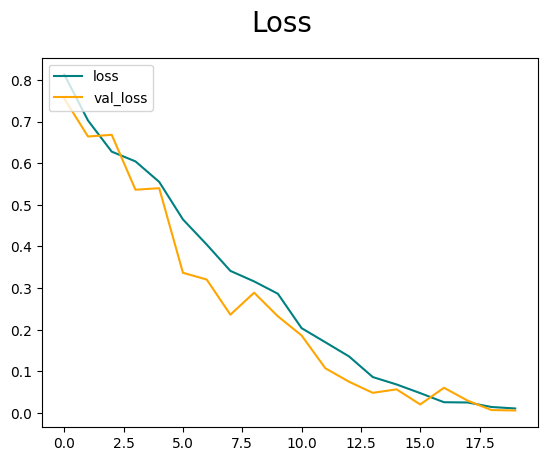

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

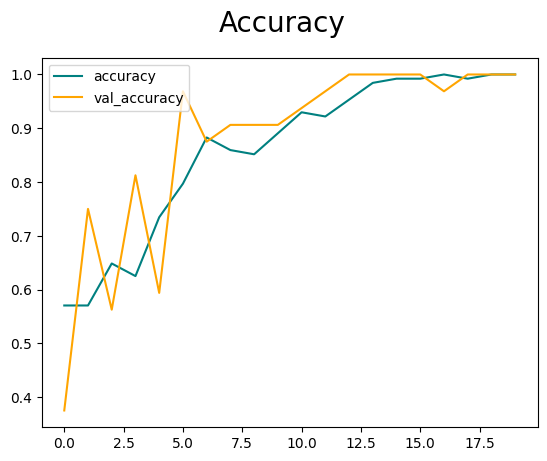

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [55]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


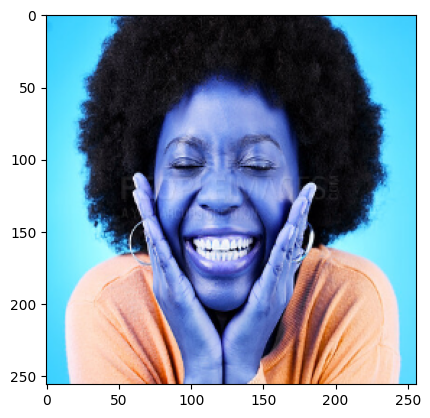

In [81]:
img = cv2.imread('/kaggle/input/happy-and-sad-people/happy.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
# np.expand_dims(resize, 0).shape #NN expects batch of images not one image

In [83]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [84]:
yhat

array([[0.08221553]], dtype=float32)

In [85]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [86]:
from tensorflow.keras.models import load_model

In [88]:
models = '/kaggle/working/models'
os.makedirs(models, exist_ok=True)
model.save(os.path.join(models, 'emotionModel.h5'))

In [89]:
new_model = load_model(os.path.join(models, 'emotionModel.h5'))

In [90]:
yhatnew= new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


In [91]:
if yhatnew > 0.5:
    print(f'The person is sad')
else:
    print(f'The person is happy')

The person is happy
